# Support Vector Machine - Find best one
This notebook tests which SVM works best for our data

author = Caroline Magg <br>
date = 30 August 2020 <br> 

______________________________________
history: <br>
2020-03-09 SVM KFold test <br>
2020-11-09 SVM KFold test with fixed bug <br>
2020-13-09 Get best SVM for KFold <br>
2020-13-09 Test best SVM for KFold with Testset <br>
2020-13-09 Extract best SVM <br>

In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd#
import cv2
import scipy
import logging as log
import skimage.segmentation as segmentation
from scipy.spatial.distance import cdist

In [2]:
log.basicConfig(format='%(levelname)s:%(message)s', level=log.INFO)

### Add dependencies

In [3]:
# add KidsBrainProject main folder to paths
sys.path.append(os.path.abspath('../../'))
sys.path.append(os.path.abspath('../utils/'))

In [4]:
# add path to data here
#path_data = "../../Data/features/"
#path_data = "../support_vector_machine/"
path_data = "../../Data/features_standardized/"

In [5]:
from sklearn import svm
from sklearn.model_selection import KFold
import random
from sklearn.multioutput import MultiOutputRegressor

In [6]:
from SVMSearch import SVMSearch

In [7]:
all_files = [ filename for filename in os.listdir(path_data) if filename.endswith( "csv" ) ]
all_files_error = [os.path.join(path_data,fn) for fn in all_files if 'error_metrics' in fn]
all_files_features = [os.path.join(path_data,fn) for fn in all_files if 'features' in fn]
len(all_files_error), len(all_files_features)

(21, 21)

In [8]:
idx = 0
all_files_error[idx], all_files_features[idx]

('../../Data/features_standardized/error_metrics_Brain.csv',
 '../../Data/features_standardized/features_Brain.csv')

# Get data range

In [9]:
for idx, fn_features, fn_errors in zip(range(len(all_files_features)), all_files_features, all_files_error):
    # get data
    features = pd.read_csv(fn_features, sep=';')
    errors = pd.read_csv(fn_errors, sep=';')
    print(fn_features)
    print(' feature numbers', len(features), len(errors))
    X = np.array(features)
    y = np.array(errors)
    print(' splits', np.shape(X), np.shape(y))
    for i in range(5): # go through all error metrics
        print('  error metrics:', i, errors.keys()[i])
        print('   ', np.min(y[:,i]), max(y[:,i]), max(y[:,i])- np.min(y[:,i]))
    break

../../Data/features_standardized/features_Brain.csv
 feature numbers 1861 1861
 splits (1861, 35) (1861, 5)
  error metrics: 0 dice_coeff
    0.3103448275862069 0.9911136320665532 0.6807688044803464
  error metrics: 1 jaccard_dist
    0.1836734693877551 0.9823838080959519 0.7987103387081969
  error metrics: 2 hausdorff_dist
    1.7320508075688772 6.855654600401044 5.123603792832167
  error metrics: 3 mod_hausdorff_dist
    0.023861976917592672 0.487461903968971 0.4635999270513783
  error metrics: 4 avg_surface_error
    0.243485663905788 0.6702207501816134 0.42673508627582546


In [10]:
for idx, fn_features, fn_errors in zip(range(len(all_files_features)), all_files_features, all_files_error):
    # get data
    features = pd.read_csv(fn_features, sep=';')
    errors = pd.read_csv(fn_errors, sep=';')
    print(fn_features)
    print(' feature numbers', len(features), len(errors))
    X = np.array(features)
    y = np.array(errors)
    print(' splits', np.shape(X), np.shape(y))
    for i in range(X.shape[1]): # go through all error metrics
        print('  feature:', i, features.keys()[i])
        print('   ', np.min(X[:,i]), max(X[:,i]), max(X[:,i])- np.min(X[:,i]))
    break

../../Data/features_standardized/features_Brain.csv
 feature numbers 1861 1861
 splits (1861, 35) (1861, 5)
  feature: 0 volume
    9.0 27955.0 27946.0
  feature: 1 surface_area
    8.0 552.0 544.0
  feature: 2 weighted_volume
    3.617714325680296 22150.08145711995 22146.463742794273
  feature: 3 weighted_cut
    3.3676357783789985 355.12392218901977 351.75628641064077
  feature: 4 lh_weighted_cut
    14.276923076923074 783.4291794665502 769.1522563896272
  feature: 5 hl_weighted_cut
    4.00040413996092 368.36058544511695 364.36018130515606
  feature: 6 mean_intensity
    65.56734693877551 123.79337803855827 58.22603109978276
  feature: 7 median_intensity
    65.0 123.0 58.0
  feature: 8 sum_intensity
    987.0 3138573.0 3137586.0
  feature: 9 min_intensity
    0.0 120.0 120.0
  feature: 10 max_intensity
    69.0 255.0 186.0
  feature: 11 iqr_distance
    0.0 2.0 2.0
  feature: 12 std
    0.5665577237325317 32.03185793092913 31.465300207196595
  feature: 13 sum_l1
    5.5 62934.5 629

In [11]:
for idx, fn_features, fn_errors in zip(range(len(all_files_features)), all_files_features, all_files_error):
    print(fn_features)
    break

../../Data/features_standardized/features_Brain.csv


In [12]:
all_files_features

['../../Data/features_standardized/features_Brain.csv',
 '../../Data/features_standardized/features_CerebellPOSTYL.csv',
 '../../Data/features_standardized/features_Cingulumleft.csv',
 '../../Data/features_standardized/features_Cingulumright.csv',
 '../../Data/features_standardized/features_Corpuscallosum.csv',
 '../../Data/features_standardized/features_CTV.csv',
 '../../Data/features_standardized/features_CTV1.csv',
 '../../Data/features_standardized/features_CTV2.csv',
 '../../Data/features_standardized/features_Fornix.csv',
 '../../Data/features_standardized/features_GTV.csv',
 '../../Data/features_standardized/features_Hypothalamus.csv',
 '../../Data/features_standardized/features_PapezCircle.csv',
 '../../Data/features_standardized/features_PTV1.csv',
 '../../Data/features_standardized/features_PTV2.csv',
 '../../Data/features_standardized/features_Scalp.csv',
 '../../Data/features_standardized/features_TemporalLobeLt.csv',
 '../../Data/features_standardized/features_TemporalLobe

# Single-output regression

# Multi-output regression

# Find best 10 in each category

### Single-output best 

results:<br>
* kernel rbf is better than sigmoid kernel <br>
* average surface error and hausdorff dist are negative (Cingulum, Thalamusant - both sides) <br>
* jaccard distance is often the best one, followed by dice coeff <br>
* C value is either low or high

In [13]:
path_rbf="../support_vector_machine/5-fold_rbf"
path_sigmoid="../support_vector_machine/5-fold_sigmoid"

all_files_rbf_single = [os.path.join(path_rbf,x) for x in os.listdir(path_rbf) if '_kfold' in x and 'singleoutput' in x]
all_files_sigmoid_single = [os.path.join(path_sigmoid,x) for x in os.listdir(path_sigmoid) if '_kfold' in x and 'singleoutput' in x]
len(all_files_rbf_single), len(all_files_sigmoid_single)

(21, 21)

In [14]:
best_single_metrics_rbf = []
best_single_score_rbf = []
best_single_c_rbf = []
single_rbf_jaccard = []
best_single_metrics_sigmoid = []
best_single_score_sigmoid = []
best_single_c_sigmoid = []
for fn_rbf, fn_sigmoid in zip(all_files_rbf_single, all_files_sigmoid_single):
    df = pd.read_csv(fn_rbf, sep=';')
    df2 = df.sort_values('score_test',axis=0)
    best_single_metrics_rbf.append(df2.tail(1)['error_metrics'].values[0])
    best_single_score_rbf.append(df2.tail(1)['score_test'].values[0])
    best_single_c_rbf.append(df2.tail(1)['C'].values[0])
    single_rbf_jaccard.append(df2[df2['error_metrics']=='jaccard_dist'].tail(1)['score_test'].values[0])
    df3 = pd.read_csv(fn_sigmoid, sep=';')
    df4 = df3.sort_values('score_test',axis=0)
    best_single_metrics_sigmoid.append(df4.tail(1)['error_metrics'].values[0])
    best_single_score_sigmoid.append(df4.tail(1)['score_test'].values[0])
    best_single_c_sigmoid.append(df4.tail(1)['C'].values[0])

In [15]:
for idx, m, s,c,b in zip(range(len(best_single_metrics_rbf)), best_single_metrics_rbf, best_single_score_rbf, best_single_c_rbf, single_rbf_jaccard):
    print(idx, m,s,c,b)

0 mod_hausdorff_dist 0.7106223995241757 85 0.025325329763119787
1 jaccard_dist 0.7197287286093946 99 0.7197287286093946
2 avg_surface_error -0.09762146547488217 9 -17.324660182478535
3 avg_surface_error -0.018748670470431338 1 -5.652412343177668
4 jaccard_dist 0.5296321356890765 5 0.5296321356890765
5 jaccard_dist 0.7480240503410809 13 0.7480240503410809
6 dice_coeff 0.6297188939248832 14 0.5564308005518022
7 jaccard_dist 0.741645415674713 13 0.741645415674713
8 jaccard_dist 0.8475274544259566 99 0.8475274544259566
9 dice_coeff 0.6595015088098464 6 0.5924195855362899
10 dice_coeff 0.503507519743406 1 0.3675266742102228
11 dice_coeff 0.7997678013437689 99 0.7789868462390684
12 jaccard_dist 0.8976360849410966 3 0.8976360849410966
13 jaccard_dist 0.8652499281307302 21 0.8652499281307302
14 jaccard_dist 0.8898030532868683 64 0.8898030532868683
15 jaccard_dist 0.9249458228641748 74 0.9249458228641748
16 jaccard_dist 0.7198157627138175 89 0.7198157627138175
17 hausdorff_dist -0.6567709162666

In [16]:
for m in np.unique(best_single_metrics_rbf):
    print(best_single_metrics_rbf.count(m), m)
for c in np.unique(best_single_c_rbf):
    print(best_single_c_rbf.count(c), c)

2 avg_surface_error
6 dice_coeff
2 hausdorff_dist
10 jaccard_dist
1 mod_hausdorff_dist
5 1
1 3
1 5
1 6
1 9
2 13
1 14
1 21
1 64
1 74
1 85
1 89
4 99


(array([9., 3., 1., 0., 0., 0., 1., 1., 2., 4.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <a list of 10 Patch objects>)

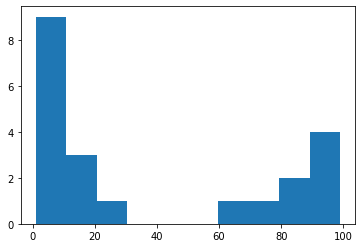

In [17]:
plt.hist(best_single_c_rbf)

In [18]:
df = pd.read_csv(all_files_rbf_single[2], sep=';')
df2 = df.sort_values('score_test',axis=0)

In [19]:
df2[df2['error_metrics']=='jaccard_dist']

,error_metrics,C,score_train,score_test,mean_error_train,mean_error_test
145,jaccard_dist,47,-3.608281,-17.604042,0.072316,0.072391
144,jaccard_dist,46,-3.607193,-17.590407,0.072289,0.072363
197,jaccard_dist,99,-3.606550,-17.585859,0.072274,0.072362
196,jaccard_dist,98,-3.606525,-17.585482,0.072273,0.072361
195,jaccard_dist,97,-3.606501,-17.585105,0.072273,0.072360
...,...,...,...,...,...,...
103,jaccard_dist,5,-3.586397,-17.334102,0.071761,0.071834
102,jaccard_dist,4,-3.586195,-17.331740,0.071756,0.071829
101,jaccard_dist,3,-3.585994,-17.329380,0.071751,0.071824
100,jaccard_dist,2,-3.585793,-17.327020,0.071746,0.071819


### Multioutput best

results <br>
* rbf in most cases better or not really worse than sigmoid kernel <br>
* ['dice_coeff', 'jaccard_dist'] is the best combi <br>
* C value is well distributed <br>

In [20]:
path_rbf="../support_vector_machine/5-fold_rbf"
path_sigmoid="../support_vector_machine/5-fold_sigmoid"

all_files_rbf_multi = [os.path.join(path_rbf,x) for x in os.listdir(path_rbf) if '_kfold' in x and 'multi' in x]
all_files_sigmoid_multi = [os.path.join(path_sigmoid,x) for x in os.listdir(path_sigmoid) if '_kfold' in x and 'multi' in x]
len(all_files_rbf_multi), len(all_files_sigmoid_multi)

(21, 21)

In [28]:
best_multi_metrics_rbf = []
best_multi_score_rbf = []
dice_jaccard_multi_score_rbf = []
best_multi_c_rbf = []
best_multi_metrics_sigmoid = []
best_multi_score_sigmoid = []
best_multi_c_sigmoid = []
for fn_rbf, fn_sigmoid in zip(all_files_rbf_multi, all_files_sigmoid_multi):
    df = pd.read_csv(fn_rbf, sep=';')
    df2 = df.sort_values('score_test',axis=0)
    best_multi_metrics_rbf.append(df2.tail(1)['error_metrics'].values[0])
    best_multi_score_rbf.append(df2.tail(1)['score_test'].values[0])
    best_multi_c_rbf.append(df2.tail(1)['C'].values[0])
    dice_jaccard_multi_score_rbf.append(df2[df2['error_metrics']=="['dice_coeff', 'jaccard_dist']"].tail(1)['score_test'].values[0])
    df3 = pd.read_csv(fn_sigmoid, sep=';')
    df4 = df3.sort_values('score_test',axis=0)
    best_multi_metrics_sigmoid.append(df4.tail(1)['error_metrics'].values[0])
    best_multi_score_sigmoid.append(df4.tail(1)['score_test'].values[0])
    best_multi_c_sigmoid.append(df4.tail(1)['C'].values[0])

In [29]:
df2['error_metrics'][0]

"['dice_coeff', 'jaccard_dist']"

In [30]:
for idx, m, s,c,b in zip(range(len(best_multi_metrics_rbf)), best_multi_metrics_rbf, best_multi_score_rbf, best_multi_c_rbf, dice_jaccard_multi_score_rbf):
    print(idx, m,s,c,b)

0 ['mod_hausdorff_dist', 'avg_surface_error'] 0.35280243095251823 7 -0.3207742291492865
1 ['jaccard_dist', 'hausdorff_dist'] 0.7071334603193096 99 0.6580168809061999
2 ['hausdorff_dist', 'avg_surface_error'] -0.5087518678402231 97 -10.202809089303418
3 ['hausdorff_dist', 'avg_surface_error'] -0.9822243101379976 59 -4.586708328355469
4 ['dice_coeff', 'jaccard_dist'] 0.521805345934063 5 0.521805345934063
5 ['dice_coeff', 'jaccard_dist'] 0.7390143644002649 7 0.7390143644002649
6 ['dice_coeff', 'jaccard_dist'] 0.5815702139782715 91 0.5815702139782715
7 ['dice_coeff', 'jaccard_dist'] 0.7144366677732332 13 0.7144366677732332
8 ['dice_coeff', 'jaccard_dist'] 0.8419964242200016 33 0.8419964242200016
9 ['dice_coeff', 'jaccard_dist'] 0.6171693758803131 96 0.6171693758803131
10 ['dice_coeff', 'jaccard_dist'] 0.4328615520169647 2 0.4328615520169647
11 ['dice_coeff', 'jaccard_dist'] 0.7893701417134622 99 0.7893701417134622
12 ['dice_coeff', 'jaccard_dist'] 0.8759914309858153 3 0.8759914309858153
13

In [32]:
for m in np.unique(best_multi_metrics_rbf):
    print(best_multi_metrics_rbf.count(m), m)
for c in np.unique(best_multi_c_rbf):
    print(best_multi_c_rbf.count(c), c)

14 ['dice_coeff', 'jaccard_dist']
3 ['hausdorff_dist', 'avg_surface_error']
1 ['hausdorff_dist', 'mod_hausdorff_dist']
1 ['jaccard_dist', 'hausdorff_dist']
1 ['jaccard_dist', 'mod_hausdorff_dist']
1 ['mod_hausdorff_dist', 'avg_surface_error']
2 1
1 2
1 3
2 5
2 7
1 13
1 16
1 33
1 45
1 57
1 59
1 89
1 91
1 96
1 97
3 99


(array([8., 2., 0., 1., 1., 2., 0., 0., 1., 6.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <a list of 10 Patch objects>)

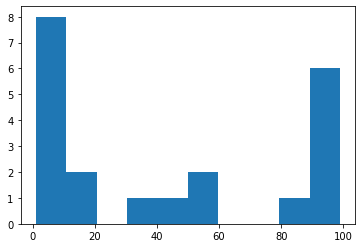

In [33]:
plt.hist(best_multi_c_rbf)

### Compare single and multi

In [34]:
for idx, s, m in zip(range(len(best_single_score_rbf)), best_single_score_rbf, best_multi_score_rbf):
    print(idx, s, m)

0 0.7106223995241757 0.35280243095251823
1 0.7197287286093946 0.7071334603193096
2 -0.09762146547488217 -0.5087518678402231
3 -0.018748670470431338 -0.9822243101379976
4 0.5296321356890765 0.521805345934063
5 0.7480240503410809 0.7390143644002649
6 0.6297188939248832 0.5815702139782715
7 0.741645415674713 0.7144366677732332
8 0.8475274544259566 0.8419964242200016
9 0.6595015088098464 0.6171693758803131
10 0.503507519743406 0.4328615520169647
11 0.7997678013437689 0.7893701417134622
12 0.8976360849410966 0.8759914309858153
13 0.8652499281307302 0.8608249559162748
14 0.8898030532868683 0.8565852495809964
15 0.9249458228641748 0.9058648847003604
16 0.7198157627138175 0.6488166518601428
17 -0.656770916266681 -1.1624288897537054
18 -0.3832907602268648 -1.0163366525771256
19 0.8624658550078254 0.8176604007619522
20 0.8355549690363926 0.8262419181828706
